In [ ]:
# DataSideAnalysys.ipynb

   Product Code  std_pop
3         4073K    290.0
4         4FFVD     47.0
43        PXNRM     37.0
49        V16W0     29.0
2         1XWMG     18.0
34        KRKHF      6.0
21        D9D75      4.0
5         6MRK8      2.0
6         6PDJ3      1.0
26        H73FY      0.0
42        PN10H      0.0
37        M8T1G      0.0
35        M3RT7      0.0
1         0VGRR      0.0
32        K32J9      0.0
0         0FHMX      0.0
46        T6T0F      0.0
13        8DT2Y      0.0
22        FT4DW      0.0
27        H8T0J      0.0
51        VJ1RP      0.0
54        XHCY0      0.0
36        M56R5      0.0
53        W9CVV      0.0
38        NRN4V      0.0
52        W88MH      0.0
39        NV0X6      0.0
47        THTC0      0.0
40        NW63X      0.0
41        P3DF4      0.0
50        VD43R      0.0
48        U298K      0.0
44        R49RX      0.0
45        T50G1      0.0
28        J7JTW      0.0
33        KKVY7      0.0
16        9FMXC      0.0
7         6YTCD      0.0
8         70HHF      0.0


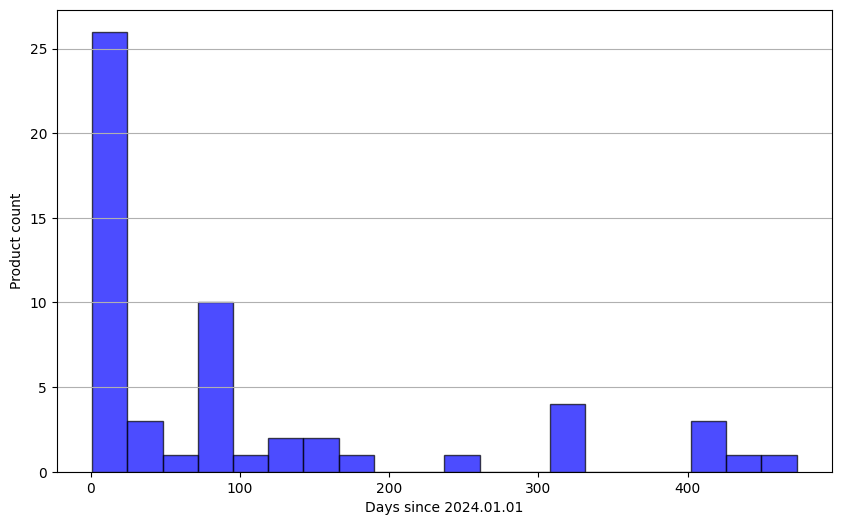

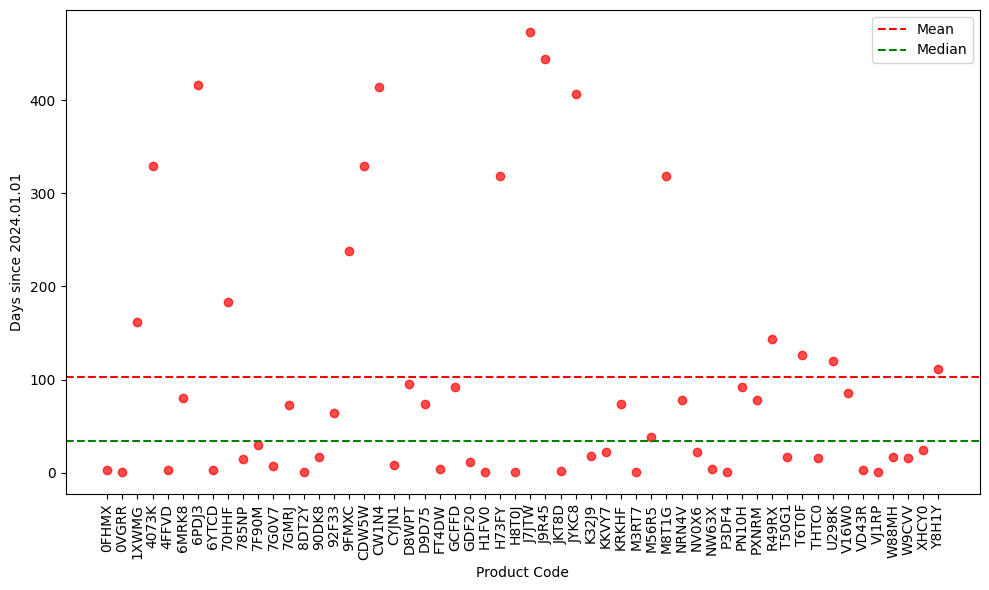

In [4]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data from Excel file into a DataFrame
dfRawData = pd.read_excel(r"C:\Users\wiktor.daszynski\Downloads\Python\Cluster Forecasting Project\Data Cluster Forecasting.xlsx")

#Rename columns heders to english
dfRawData.rename(columns={
    "Kod towaru": "Product Code",
    'Opis towaru': 'Product Name',
    'Data wystawienia': 'Date of Sale',
    'Wartość towaru': 'Value',
    "Cena jednostkowa": "Unit price",
    "Ilość": "Quantity"
    }, inplace=True)

# check price standard deviation per Product code

unit_price_std = dfRawData.groupby('Product Code')['Unit price'].agg(
    std_pop = lambda x: x.std(ddof=0)
).reset_index()

print(round(unit_price_std.sort_values(by="std_pop", ascending=False)),2)


# Check date of first code sell (min. date when sale >0)
min_date = dfRawData.groupby('Product Code')['Date of Sale'].min().reset_index()
min_date["Days since 2024.01.01"] = (min_date["Date of Sale"] - pd.to_datetime("2024-01-01")).dt.days

plt.figure(figsize=(10, 6))
plt.hist(min_date["Days since 2024.01.01"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Days since 2024.01.01')
plt.ylabel("Product count")
plt.grid(axis = "y")

plt.figure(figsize=(10, 6))
plt.scatter(min_date["Product Code"], min_date["Days since 2024.01.01"], color='red', alpha=0.7)
plt.ylabel('Days since 2024.01.01')
plt.xlabel("Product Code")
plt.xticks(rotation=90)
plt.tight_layout()

mean_val = min_date["Days since 2024.01.01"].mean()
plt.axhline(mean_val, color='red', linestyle='--', label='Mean')

median_val = min_date["Days since 2024.01.01"].median()
plt.axhline(median_val, color='green', linestyle='--', label='Median')

plt.legend()
plt.show()
